In [15]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [16]:
from sklearn.model_selection import cross_val_score
# evaluate sklearn histogram gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import (GradientBoostingClassifier, 
                              HistGradientBoostingClassifier)

In [17]:
file_path_ad_clean = "../Raw_data/application_data_cleaned.csv"
application_df = pd.read_csv(file_path_ad_clean)
application_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# convert text to numbers for model
application_df = pd.get_dummies(application_df)

In [19]:
application_df.head(10)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,False,False,False,False,False,False,True,False,True,False
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,False,True,False,False,False,False,False,False,True,False
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,False,False,False,False,False,False,False,False,False,False
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,False,False,False,False,False,False,False,False,False,False
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,False,False,False,False,False,False,False,False,False,False
5,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,...,False,False,False,False,False,False,False,False,False,False
6,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,-1213.0,...,False,False,False,False,False,False,False,False,False,False
7,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,...,False,False,False,False,False,False,False,False,False,False
8,0,0,112500.0,1019610.0,33826.5,913500.0,0.018634,-20099,365243,-7427.0,...,False,False,False,False,False,False,False,False,False,False
9,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,-14469,-2019,-14437.0,...,False,False,False,False,False,False,False,False,False,False


In [20]:
#seperate feature and target
features = application_df.drop('TARGET',axis=1).values
target = application_df['TARGET'].values

In [ ]:
X = features
y = target

In [ ]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state = 11, test_size=0.30)

In [ ]:
#using RandomOverSampler to balance dataset
y_df = pd.DataFrame(y)
print('Value counts before balancing')
print(y_df.value_counts())
from imblearn.over_sampling import RandomOverSampler
sampling_strategy = 1
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(X_train, y_train)
y_res_df = pd.DataFrame(y_res)
print('Value counts after balancing')
print(y_res_df.value_counts())

Value counts before balancing
0    280845
1     24703
Name: count, dtype: int64
Value counts after balancing
0    280845
1    280845
Name: count, dtype: int64


>10 0.708 (0.002)
>50 0.711 (0.002)
>100 0.712 (0.002)


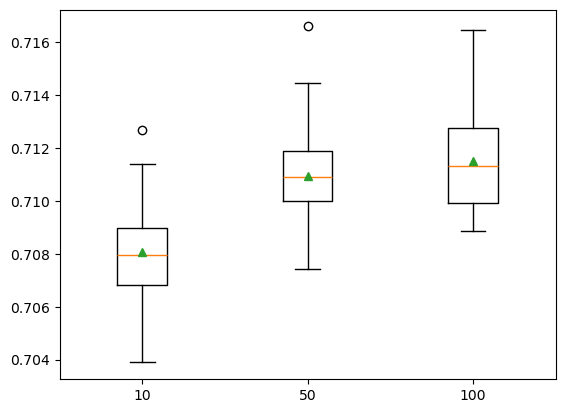

In [ ]:
# compare number of bins for sklearn histogram gradient boosting
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import HistGradientBoostingClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in [10, 50, 100]:
		models[str(i)] = HistGradientBoostingClassifier(max_bins=i, max_iter=100)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the scores
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X_res, y_res)
	# stores the results
	results.append(scores)
	names.append(name)
	# report performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
print(scores)

[0.70948388 0.71450444 0.70884296 0.71219    0.70991116 0.71142445
 0.71297335 0.70969752 0.71160249 0.71185173 0.70918122 0.71055208
 0.70962631 0.71235023 0.71172711 0.71425519 0.71397034 0.70996457
 0.71080133 0.71284872 0.7095907  0.71069451 0.71069451 0.71644501
 0.71252826 0.71092596 0.71329381 0.71121081 0.70923463 0.71283092]
